# Sports Celebrity Image Classification

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Preprocessing - Detecting face and eyes

When we look at any image, most of the time we identify a person using a face.

An image might contain multiple faces, or the face could be obstructed and not clear.

Therefore, the first step in our pre-processing pipeline is to detect clear faces from an image.

Once the face is detected, we will detect eyes.

If two eyes are detected, then only we will keep that image, otherwise we will discard it.

In [3]:
img = cv2.imread('sharapova1.jpg')
img.shape

(555, 700, 3)

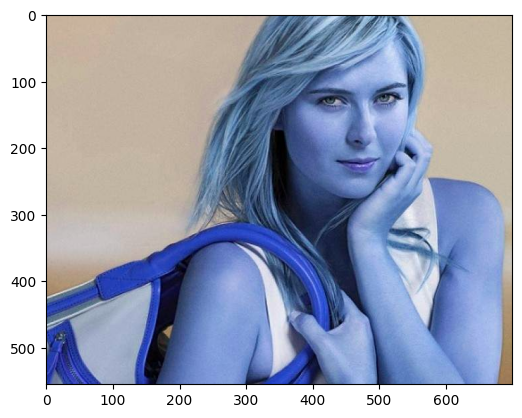

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

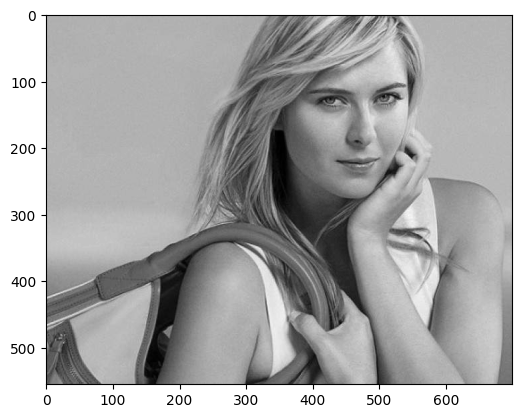

In [6]:
plt.imshow(gray, cmap='gray')

# We will use Haar Cascade from OpenCV to detect the face and eyes.

In [7]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

The above 4 values indicate x, y, width and heightt

We create a rectangle to highlight the region of the face.

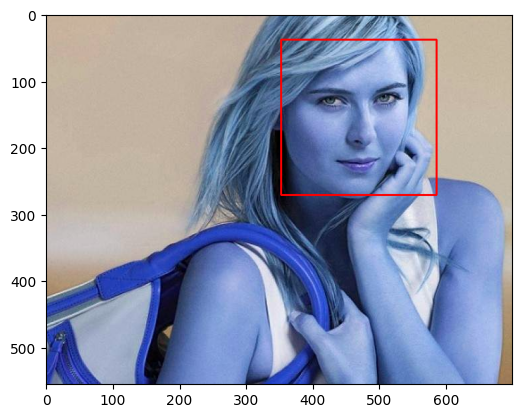

In [9]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2) # draws a rectangle on the image 'img' from coordinate (x,y) ranging to (x+w, y+h). (255, 0, 0) indicates RGB.
plt.imshow(face_img)

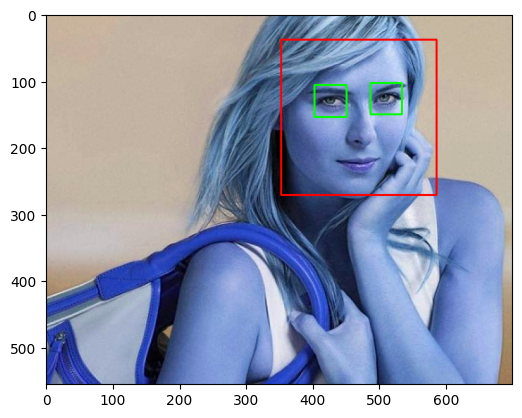

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2) # draws a rectangle
    roi_gray = gray[y:y+h, x:x+w] # region of interest of the image in gray
    roi_color = face_img[y:y+h, x:x+w] #region of intererst of the image in original color
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey),(ex+ew, ey+eh), (0, 255, 0), 2) # creates a rectangle highlighting the eyes


plt.imshow(face_img, cmap='gray')
plt.show()

## Preprocessing - Cropping the facial region of the image

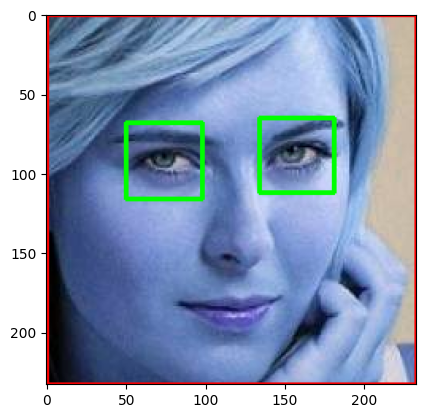

In [11]:
plt.imshow(roi_color, cmap='gray')

We create a function that takes an image as input and return the cropped picture only if it is clear and both the eyes are visible

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

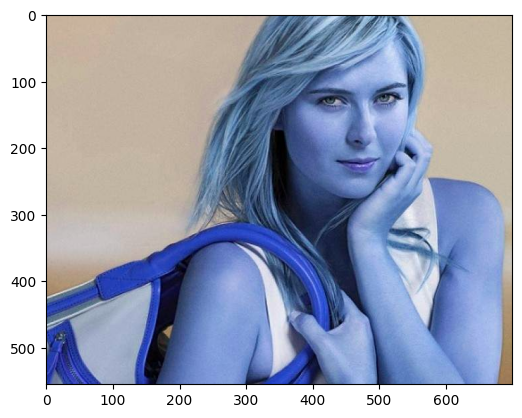

In [13]:
original_image = cv2.imread('sharapova1.jpg')
plt.imshow(original_image)

As seen above, the picture is clear, and both the eyes are visible. Therefore, the cropped picture will be returned.

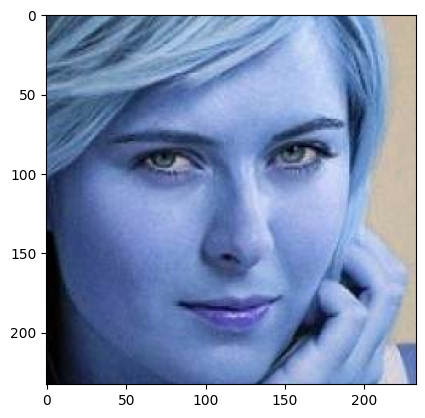

In [14]:
cropped_image = get_cropped_image_if_2_eyes('sharapova1.jpg')
plt.imshow(cropped_image)

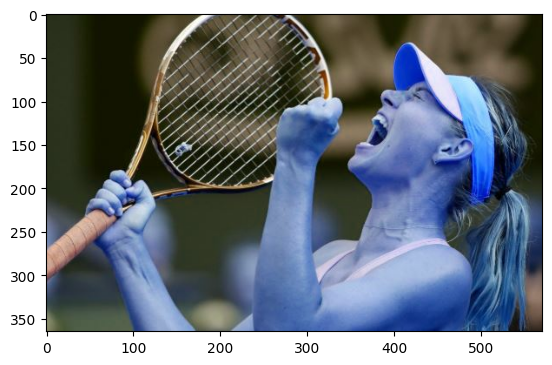

In [15]:
org_image_obstructed = cv2.imread('sharapova2.JPG')
plt.imshow(org_image_obstructed)

As seen above, the picture is clear, but both the eyes are not visible. Therefore, no picture will be returned.

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('sharapova2.JPG')
cropped_image_no_2_eyes

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
path_to_data = r'/content/drive/MyDrive/Image_Classification_Data/Data'
path_to_cr_data = r'/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/'

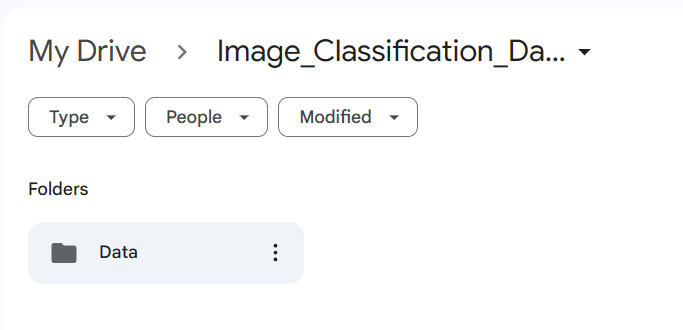

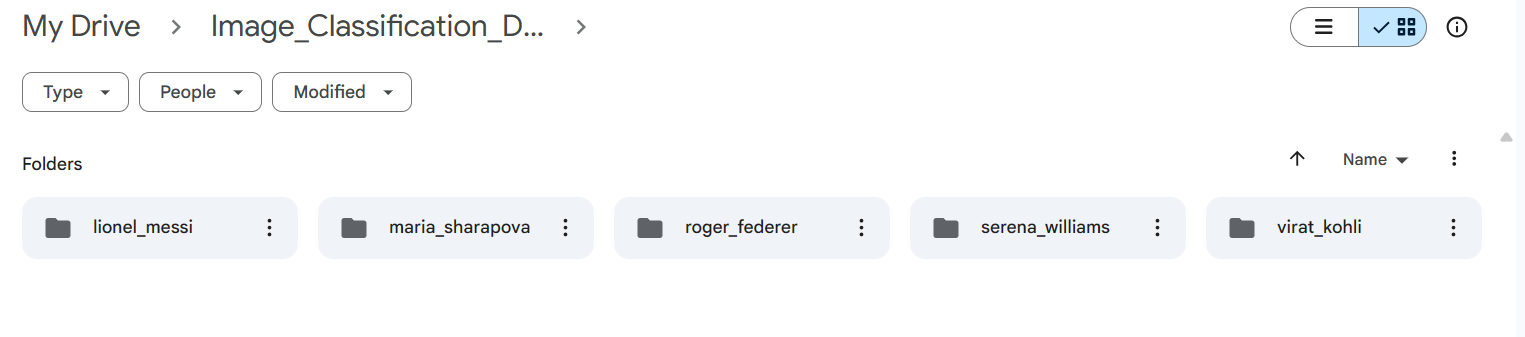

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path) # appends the path of all the folders inside the 'Data' folder

In [20]:
img_dirs

['/content/drive/MyDrive/Image_Classification_Data/Data/maria_sharapova',
 '/content/drive/MyDrive/Image_Classification_Data/Data/serena_williams',
 '/content/drive/MyDrive/Image_Classification_Data/Data/lionel_messi',
 '/content/drive/MyDrive/Image_Classification_Data/Data/virat_kohli',
 '/content/drive/MyDrive/Image_Classification_Data/Data/roger_federer']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data) # deletes the folder called 'Cropped'. The reason we delete the folder first is if we run the code multiple times, we will get multiple folders.
os.mkdir(path_to_cr_data) # creates a new folder called 'Cropped'

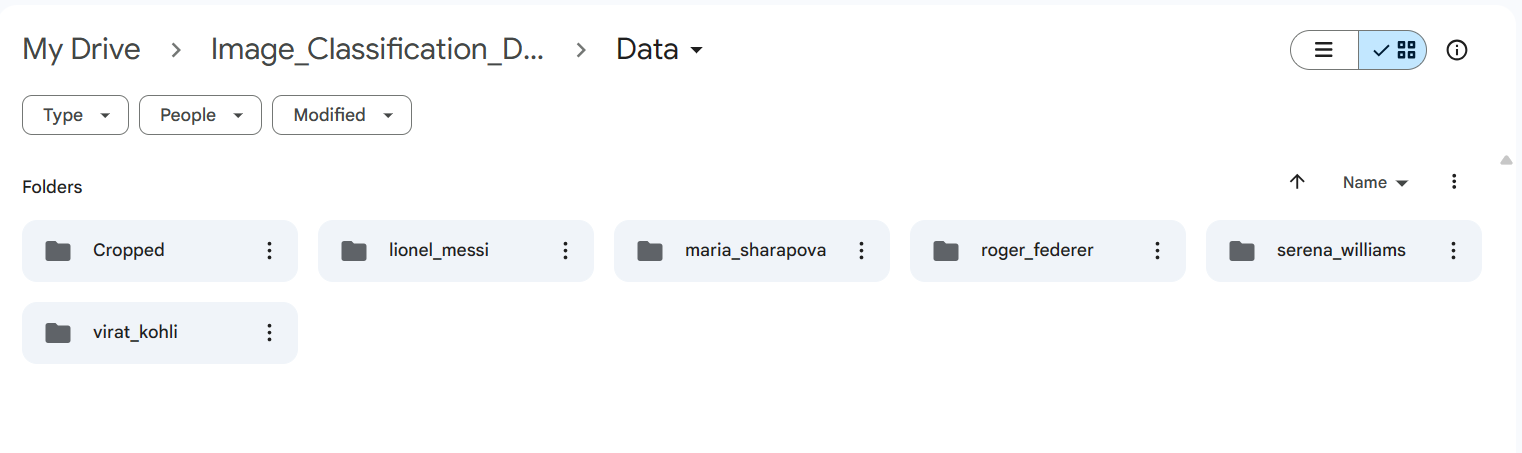

In [22]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs: # iterating through all the directories that contain images
    count = 1
    celebrity_name = img_dir.split('/')[-1] # the last part in the path mentions the celebrity name. We split the path by '/' and access the last element
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = [] # initializing the dictionary

    for entry in os.scandir(img_dir): # scans the directory, iterating through each image
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name # creates a directory in the Cropped folder named as per the name of celebrity
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder) # creates a directory in the Cropped folder named as per the name of celebrity, if not already created
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png" # naming the cropped image (example: lionel_messi4.png)
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color) # saves the cropped image into the cropped folder
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path) # appending the names of the cropped images into the dictionary for further use
            count += 1

maria_sharapova
Generating cropped images in folder:  /content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova
serena_williams
Generating cropped images in folder:  /content/drive/MyDrive/Image_Classification_Data/Data/Cropped/serena_williams
lionel_messi
Generating cropped images in folder:  /content/drive/MyDrive/Image_Classification_Data/Data/Cropped/lionel_messi
virat_kohli
Generating cropped images in folder:  /content/drive/MyDrive/Image_Classification_Data/Data/Cropped/virat_kohli
roger_federer
Generating cropped images in folder:  /content/drive/MyDrive/Image_Classification_Data/Data/Cropped/roger_federer


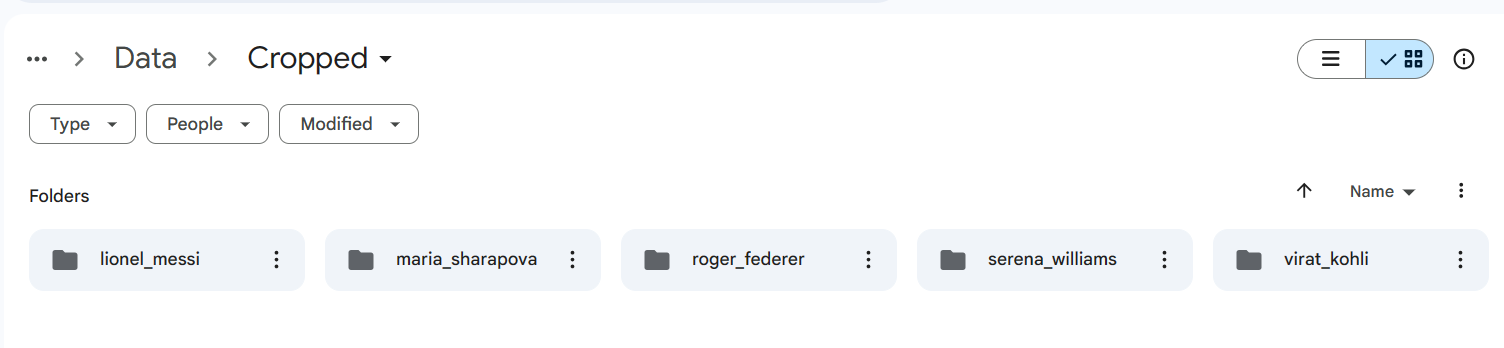

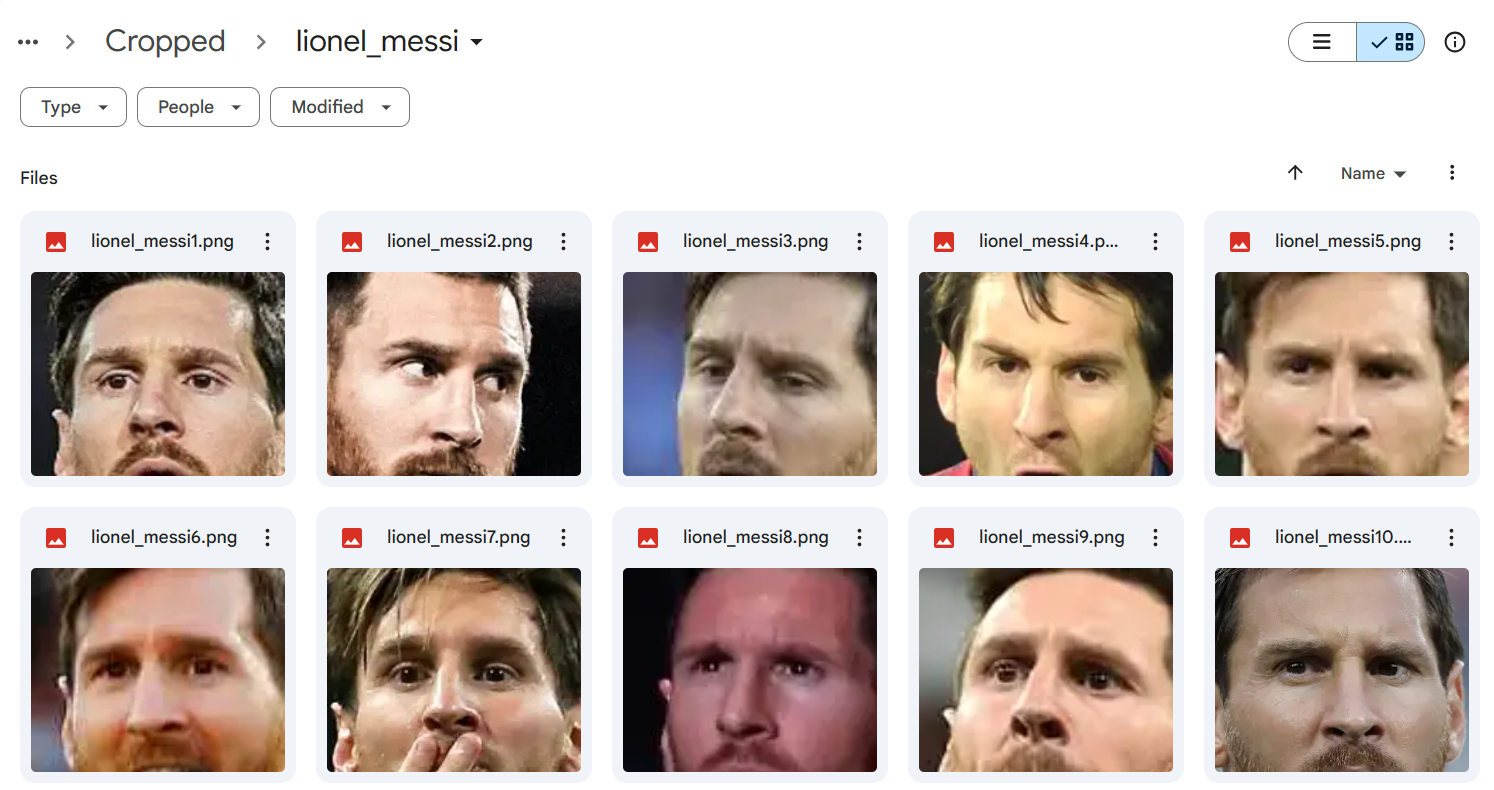

Let's review a picture

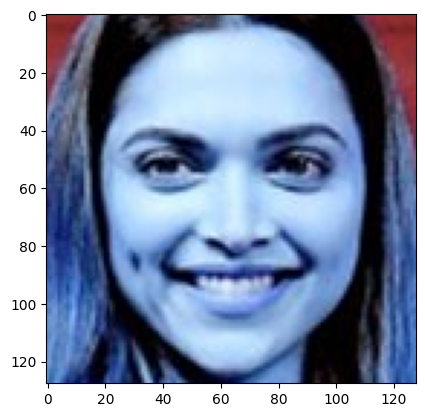

In [23]:
test_cropped = cv2.imread('/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/virat_kohli/virat_kohli36.png')
plt.imshow(test_cropped)

As seen above, this picture is definitely not of Virat Kohli.

This error is because the function written just crops the images. The computer itself cannot detect if the image is of the right person or no.

This validation is to be done by humans itself.

Therefore, we will manually review and delete the incorrect pictures.

## Preprocessing - Using Wavelet Transform as a feature for traning our model

In a wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc.

In [24]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

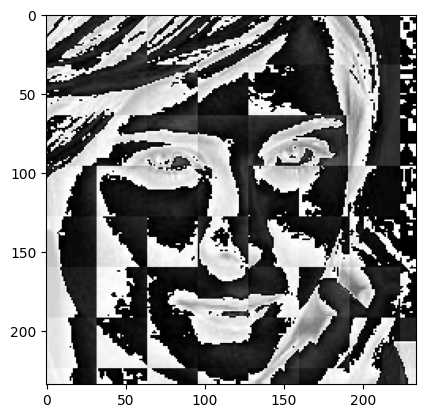

In [25]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

We can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier.

In [26]:
celebrity_file_names_dict

{'maria_sharapova': ['/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova1.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova2.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova3.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova4.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova5.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova6.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova7.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova8.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova9.png',
  '/content/drive/MyDrive/Image_Classificatio

As seen above, the dictionary will still contain the images that we had manually removed (ex. virat_kohli36).

Therefore, we need to make the changes.

In [27]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'maria_sharapova': ['/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova1.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova2.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova3.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova4.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova5.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova6.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova7.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova8.png',
  '/content/drive/MyDrive/Image_Classification_Data/Data/Cropped/maria_sharapova/maria_sharapova10.png',
  '/content/drive/MyDrive/Image_Classificati

Now the deleted images are not present in the dictionary. It was important to remove them as we would be iterating though this dictionay for the input to train our model.

We assign each celebrity name with a number as the model only works only on numeric data.

In [28]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'maria_sharapova': 0,
 'serena_williams': 1,
 'lionel_messi': 2,
 'virat_kohli': 3,
 'roger_federer': 4}

## Images in cropped folder can be used for model training. We will use these raw images, along with wavelet transformed images to train our classifier.

In [29]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items(): # iterating through teh dictionary that contains the path of all the images
    for training_image in training_files:
        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img, (32, 32)) # we scale every image into a fixed size
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3, 1), scaled_img_har.reshape(32*32, 1))) # we stack the colored and the wavelet image on top of each other and consider it together
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [30]:
X = np.array(X).reshape(len(X),4096).astype(float) # we convert X into float to avoid warnings during the testing period.
X.shape

(171, 4096)

# We are done with cleaning the data. We will now train our model.

We use GridSearch to try out different models with different parameters.

In [31]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [35]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params']).sort_values('best_score', ascending=False)
df

model  best_score  \
2  logistic_regression    0.890154   
0                  svm    0.867077   
1        random_forest    0.680000   

                                    best_params  
2                  {'logisticregression__C': 5}  
0        {'svc__C': 1, 'svc__kernel': 'linear'}  
1  {'randomforestclassifier__n_estimators': 10}

As seen above, Logistic Regression gives us the best score when tested on the validation set. Therefore, we will use Logistic Regression as our model.

In [36]:
final_model = LogisticRegression(C=1, max_iter=1000)
final_model.fit(X_train, y_train)
final_model.score(X_test, y_test)

0.8837209302325582

## We test a few images to check how our model performs.

In [37]:
test = path_to_data + '/Test'
if not os.path.exists(test):
  os.makedirs(test)

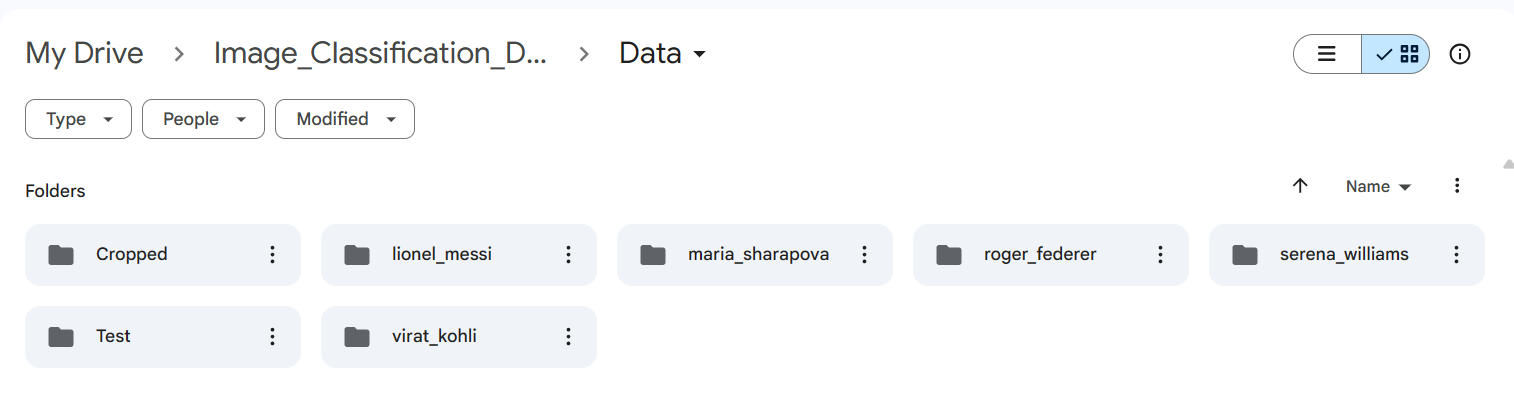

For demonstration, I have taken 1 pic at a time. Othwerise, we can take multiple test images and test them together.

We could write a function instead or running the code again and again.

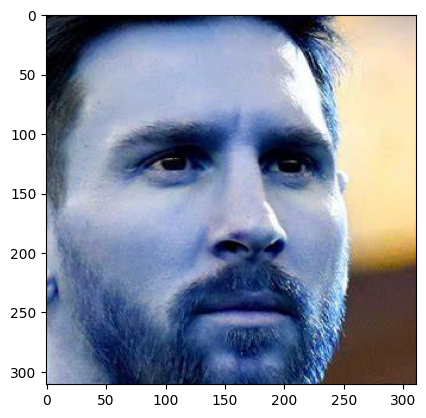

In [46]:
test1 = cv2.imread('/content/messi.jpeg')
test1_crop = get_cropped_image_if_2_eyes('/content/messi.jpeg')
plt.imshow(test1_crop, cmap='gray')

In [47]:
x1 = []

test1_crop_name = 'Test1' + '.png'
test1_crop_path = test + '/' + test1_crop_name
cv2.imwrite(test1_crop_path, test1_crop)
img = cv2.imread(test1_crop_path)
scaled_raw_img = cv2.resize(img, (32, 32))
img_har = w2d(img, 'db1', 5)
scaled_img_har = cv2.resize(img_har, (32, 32))
combined_img = np.vstack((scaled_raw_img.reshape(32*32*3, 1), scaled_img_har.reshape(32*32, 1)))
x1.append(combined_img)

In [48]:
x1 = np.array(x1).reshape(len(x1),4096).astype(float)

In [49]:
final_model.predict(x1)[0]

2

2 indicates Lionel Messi. Therefore, our model has corrwctly identified.

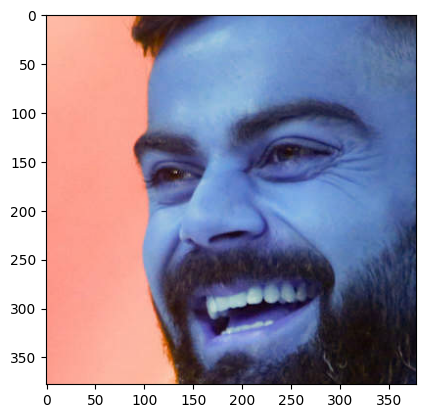

In [50]:
test2 = cv2.imread('/content/5fa375512b459.jpeg')
test2_crop = get_cropped_image_if_2_eyes('/content/5fa375512b459.jpeg')
plt.imshow(test2_crop, cmap='gray')

In [51]:
x2 = []

test2_crop_name = 'Test2' + '.png'
test2_crop_path = test + '/' + test2_crop_name
cv2.imwrite(test2_crop_path, test2_crop)
img = cv2.imread(test2_crop_path)
scaled_raw_img = cv2.resize(img, (32, 32))
img_har = w2d(img, 'db1', 5)
scaled_img_har = cv2.resize(img_har, (32, 32))
combined_img = np.vstack((scaled_raw_img.reshape(32*32*3, 1), scaled_img_har.reshape(32*32, 1)))
x2.append(combined_img)

In [52]:
x2 = np.array(x2).reshape(len(x2),4096).astype(float) # we convert X into float to avoid warnings during the testing period.

In [53]:
final_model.predict(x2)[0]

3

3 indicates Virat Kohli. Therefore, our model has correctly identified.